supporting notebook for nmi_06_0202_iterative for validation of example 24 output and the SOR algorithm, in particular.
</br></br>

conclusion: that SOR algorithm in sauer2 is incorrect/incomplete; that final plot is not of infinity-norm.
</br>


In [ ]:
import numpy as np

#https://numpy.org/doc/stable/reference/generated/numpy.dot.html

a = np.array([[3,-1,0,0,0,.5],[-1,3,-1,0,.5,0],[0,-1,3,-1,0,0],[0,0,-1,3,-1,0],[0,.5,0,-1,3,-1],[.5,0,0,0,-1,3]])
b = np.array([[2.5],[1.5],[1],[1],[1.5],[2.5]])

# system
x_sys = np.linalg.solve(a,b)
print(f"system solution: {x_sys.flatten()}\n")

x0 = np.array([[0.],[0.],[0.],[0.],[0.],[0.]]) # for sauer2 data
n = len(x0)
imax = 6

d = np.zeros_like(a)
np.fill_diagonal(d,np.diagonal(a))
inv_d = np.linalg.inv(d)
l = np.tril(a,k=-1) # k = -1 ~ below diagonal
u = np.triu(a,k=1)  # k = +1 ~ above diagonal

# jacobi
x_jac = x0.copy()
for i in range(imax):
  x_jac = np.dot(inv_d,b - np.dot(l+u,x_jac))
  print(f"jac step {i+1} ",x_jac.flatten())
print() # spacer

# gauss-seidel
x_old = x0.copy()
x_new = x_old.copy()
for i in range(imax):
  for k in range(n): # per row k
    x_new[k] = inv_d[k,k]*(b[k] - np.dot(u[k],x_old) - np.dot(l[k],x_new))
  x_old = x_new.copy()
  print(f"gas step {i+1} ",x_old.flatten())
print() # spacer

# sor
w = 1.1
inv_dwl = np.linalg.inv(d + w*l)
x_old = x0.copy()
x_new = x_old.copy()
for i in range(imax):
  for k in range(n): # per row k
    #x_new[k] = inv_dwl[k,k]*((1-w)*np.dot(d[k],x_old) - w*np.dot(u[k],x_old)) + w*np.dot(inv_dwl[k],b)
    x_new[k] = (1-w)*x_old[k] + w*(inv_d[k,k]*(b[k] - np.dot(u[k],x_old) - np.dot(l[k],x_new)))
  x_old = x_new.copy()
  print(f"sor step {i+1} ",x_old.flatten())
print() # spacer


system solution: [1. 1. 1. 1. 1. 1.]

jac step 1  [0.83333333 0.5        0.33333333 0.33333333 0.5        0.83333333]
jac step 2  [0.86111111 0.80555556 0.61111111 0.61111111 0.80555556 0.86111111]
jac step 3  [0.95833333 0.85648148 0.80555556 0.80555556 0.85648148 0.95833333]
jac step 4  [0.95910494 0.94521605 0.88734568 0.88734568 0.94521605 0.95910494]
jac step 5  [0.98855453 0.95794753 0.94418724 0.94418724 0.95794753 0.98855453]
jac step 6  [0.98789009 0.98458933 0.96737826 0.96737826 0.98458933 0.98789009]

gas step 1  [0.83333333 0.77777778 0.59259259 0.5308642  0.5473251  0.87688615]
gas step 2  [0.9464449  0.92179165 0.81755195 0.78829235 0.90142756 0.97606837]
gas step 3  [0.97791915 0.94825244 0.9121816  0.93786972 0.97993729 0.99699257]
gas step 4  [0.98325205 0.96848833 0.96878602 0.98290777 0.99855206 1.00230868]
gas step 5  [0.98911133 0.98620711 0.98970496 0.99608567 1.0017636  1.00240264]
gas step 6  [0.99500193 0.99460836 0.99689801 0.99955387 1.00155078 1.00134994]



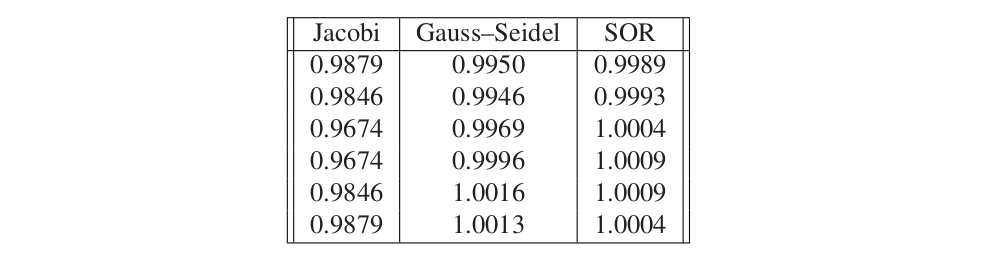

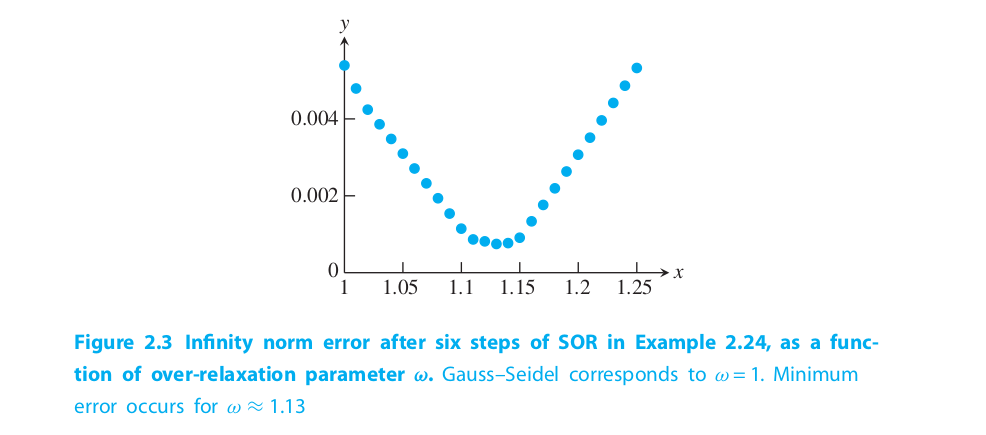

|   i |    ω |   Δ inf-norm |   Δ L1-norm |   Δ L2-norm |
|-----|------|--------------|-------------|-------------|
|   1 | 1    |  0.00155078  | 0.0110371   | 0.00449611  |
|   2 | 1.01 |  0.00156893  | 0.00920453  | 0.00374942  |
|   3 | 1.02 |  0.00156105  | 0.00754652  | 0.00307386  |
|   4 | 1.03 |  0.00153027  | 0.00605072  | 0.0024644   |
|   5 | 1.04 |  0.00147958  | 0.00470545  | 0.00191626  |
|   6 | 1.05 |  0.00141185  | 0.00349963  | 0.00142493  |
|   7 | 1.06 |  0.0013298   | 0.00242285  | 0.00098616  |
|   8 | 1.07 |  0.00123601  | 0.00146531  | 0.000595961 |
|   9 | 1.08 |  0.00113293  | 0.000617815 | 0.000250581 |
|  10 | 1.09 |  0.00102288  | 0.000128212 | 5.34801e-05 |
|  11 | 1.1  |  0.00090803  | 0.000780776 | 0.000319488 |
|  12 | 1.11 |  0.00086417  | 0.00134731  | 0.000550474 |
|  13 | 1.12 |  0.00081327  | 0.00183471  | 0.000749247 |
|  14 | 1.13 |  0.000746841 | 0.00224932  | 0.0009184   |
|  15 | 1.14 |  0.000770714 | 0.00259701  | 0.00106032  |
|  16 | 1.15 |

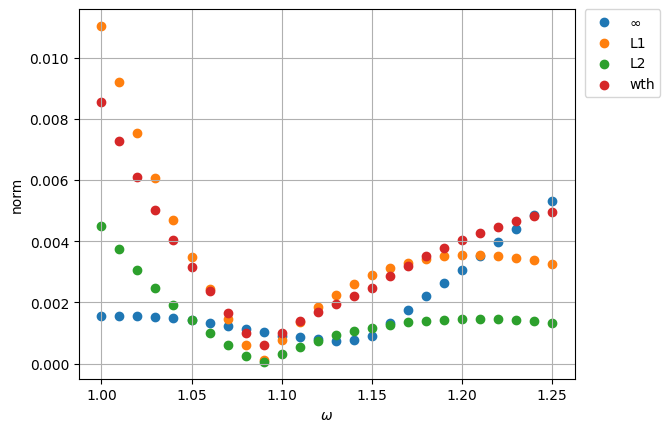

In [ ]:
# requires execution of previous cell

import matplotlib.pyplot as plt
from tabulate import tabulate

ws = np.linspace(1,1.25,26)
ns_inf = np.zeros_like(ws)
ns_l1 = np.zeros_like(ws)
ns_l2 = np.zeros_like(ws)
n = len(x0)
n_act_inf = np.linalg.norm(x_sys,np.inf)
n_act_l1 = np.linalg.norm(x_sys,ord=1)
n_act_l2 = np.linalg.norm(x_sys)

for wi,w in enumerate(ws):
  inv_dwl = np.linalg.inv(d + w*l)
  x_old = x0.copy()
  x_new = x_old.copy()
  for i in range(imax):
    for k in range(n): # per row k
      #x_new[k] = inv_dwl[k,k]*((1-w)*np.dot(d[k],x_old) - w*np.dot(u[k],x_old)) + w*np.dot(inv_dwl[k],b)
      x_new[k] = (1-w)*x_old[k] + w*(inv_d[k,k]*(b[k] - np.dot(u[k],x_old) - np.dot(l[k],x_new)))
    x_old = x_new.copy()
  ns_inf[wi] = np.linalg.norm(x_new,np.inf)
  ns_l1[wi] = np.linalg.norm(x_new,ord=1)
  ns_l2[wi] = np.linalg.norm(x_new)

data = []
for wi,w in enumerate(ws):
  data.append([wi+1,w,abs(n_act_inf-ns_inf[wi]),abs(n_act_l1 -ns_l1[wi]),abs(n_act_l2 -ns_l2[wi])])
print(tabulate(data,headers=['i',chr(969),chr(916)+" inf-norm",chr(916)+" L1-norm",chr(916)+" L2-norm"],tablefmt="github"),"\n")

fig,ax = plt.subplots()
ax.scatter([row[1] for row in data],[row[2] for row in data],label="$\infty$")
ax.scatter([row[1] for row in data],[row[3] for row in data],label="L1")
ax.scatter([row[1] for row in data],[row[4] for row in data],label="L2")
ax.scatter([row[1] for row in data],[(row[2]+row[3]+row[4])/2 for row in data],label="wth")
ax.set(xlabel="$\omega$",ylabel="norm",title="")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.grid()
#fig.savefig("test.png")
plt.show()
